### CTGAN 

Husband olan satırda cinsiyete female demesi gibi sorunlar var en belirgin şekilde.

In [9]:
import pandas as pd
from ctgan import CTGAN
from table_evaluator import TableEvaluator

data = pd.read_csv("adult.csv")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [36]:
def col_names(dataframe, cat_th = 10):
    
    
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_cols = cat_cols + num_but_cat
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols

cat_cols, num_cols = col_names(data)

In [37]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [38]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [21]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data, cat_cols, epochs = 100)

Gen. (0.21) | Discrim. (-0.10): 100%|████████████████████████████████████████████████| 100/100 [10:11<00:00,  6.12s/it]


In [22]:
samples = ctgan.sample(1000)

In [23]:
samples

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Self-emp-inc,78311,Doctorate,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,3,0,40,United-States,>50K
1,30,Local-gov,100480,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Female,14802,0,40,Jamaica,<=50K
2,39,Private,158609,Some-college,10,Never-married,Other-service,Husband,Asian-Pac-Islander,Male,-8,-1,40,Philippines,<=50K
3,18,?,104974,11th,10,Separated,?,Own-child,White,Female,-12,1,11,United-States,<=50K
4,28,Private,84732,HS-grad,9,Separated,Adm-clerical,Husband,Asian-Pac-Islander,Female,-5,1900,40,France,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,Private,145492,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,-5,1855,48,United-States,>50K
996,27,Private,193632,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7574,0,40,United-States,>50K
997,56,Private,386117,12th,10,Never-married,Craft-repair,Own-child,White,Male,-14,0,33,El-Salvador,<=50K
998,32,Private,298133,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,-17,0,40,United-States,<=50K


(32561, 15) (1000, 15)


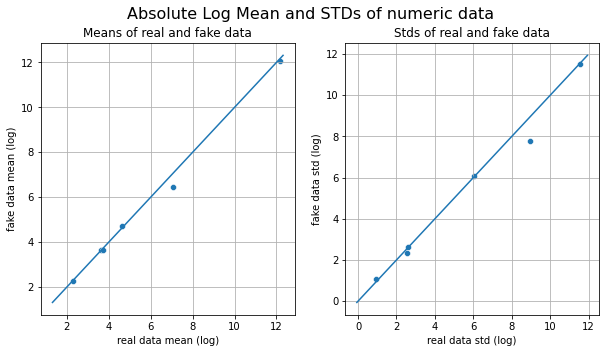

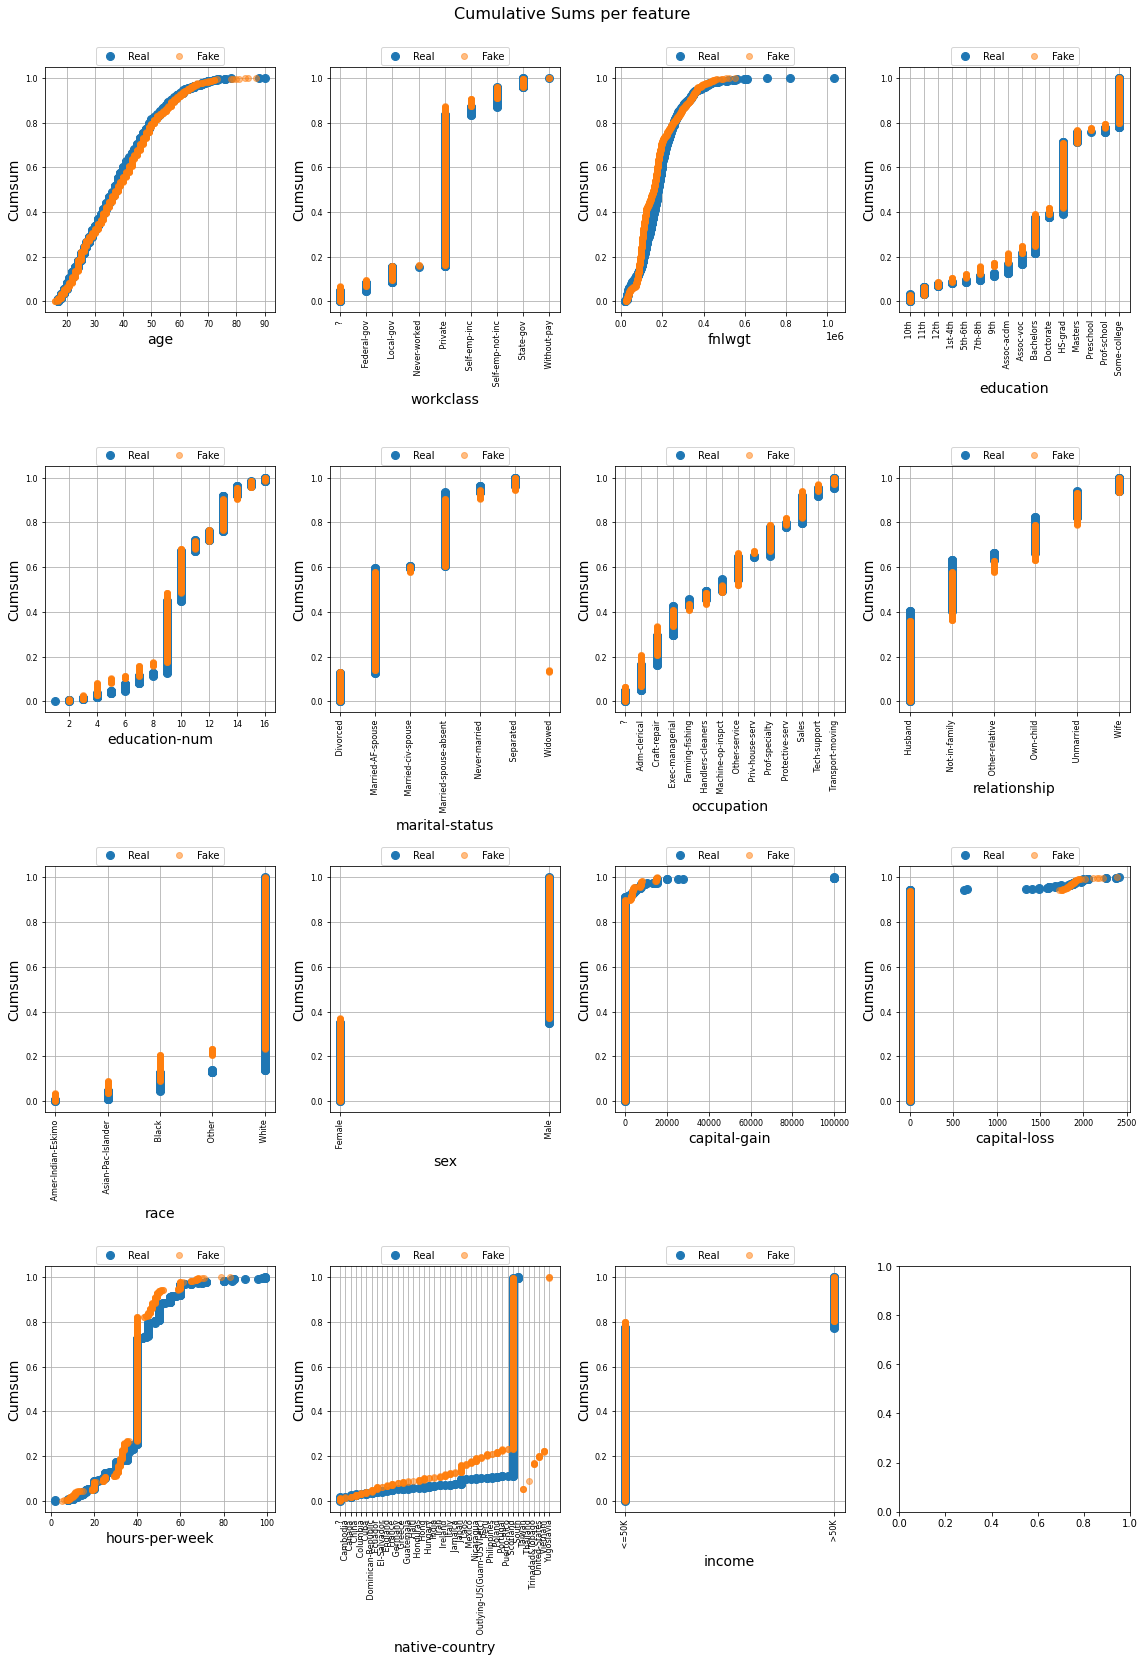

ModuleNotFoundError: No module named 'pandas.core.methods.to_dict'

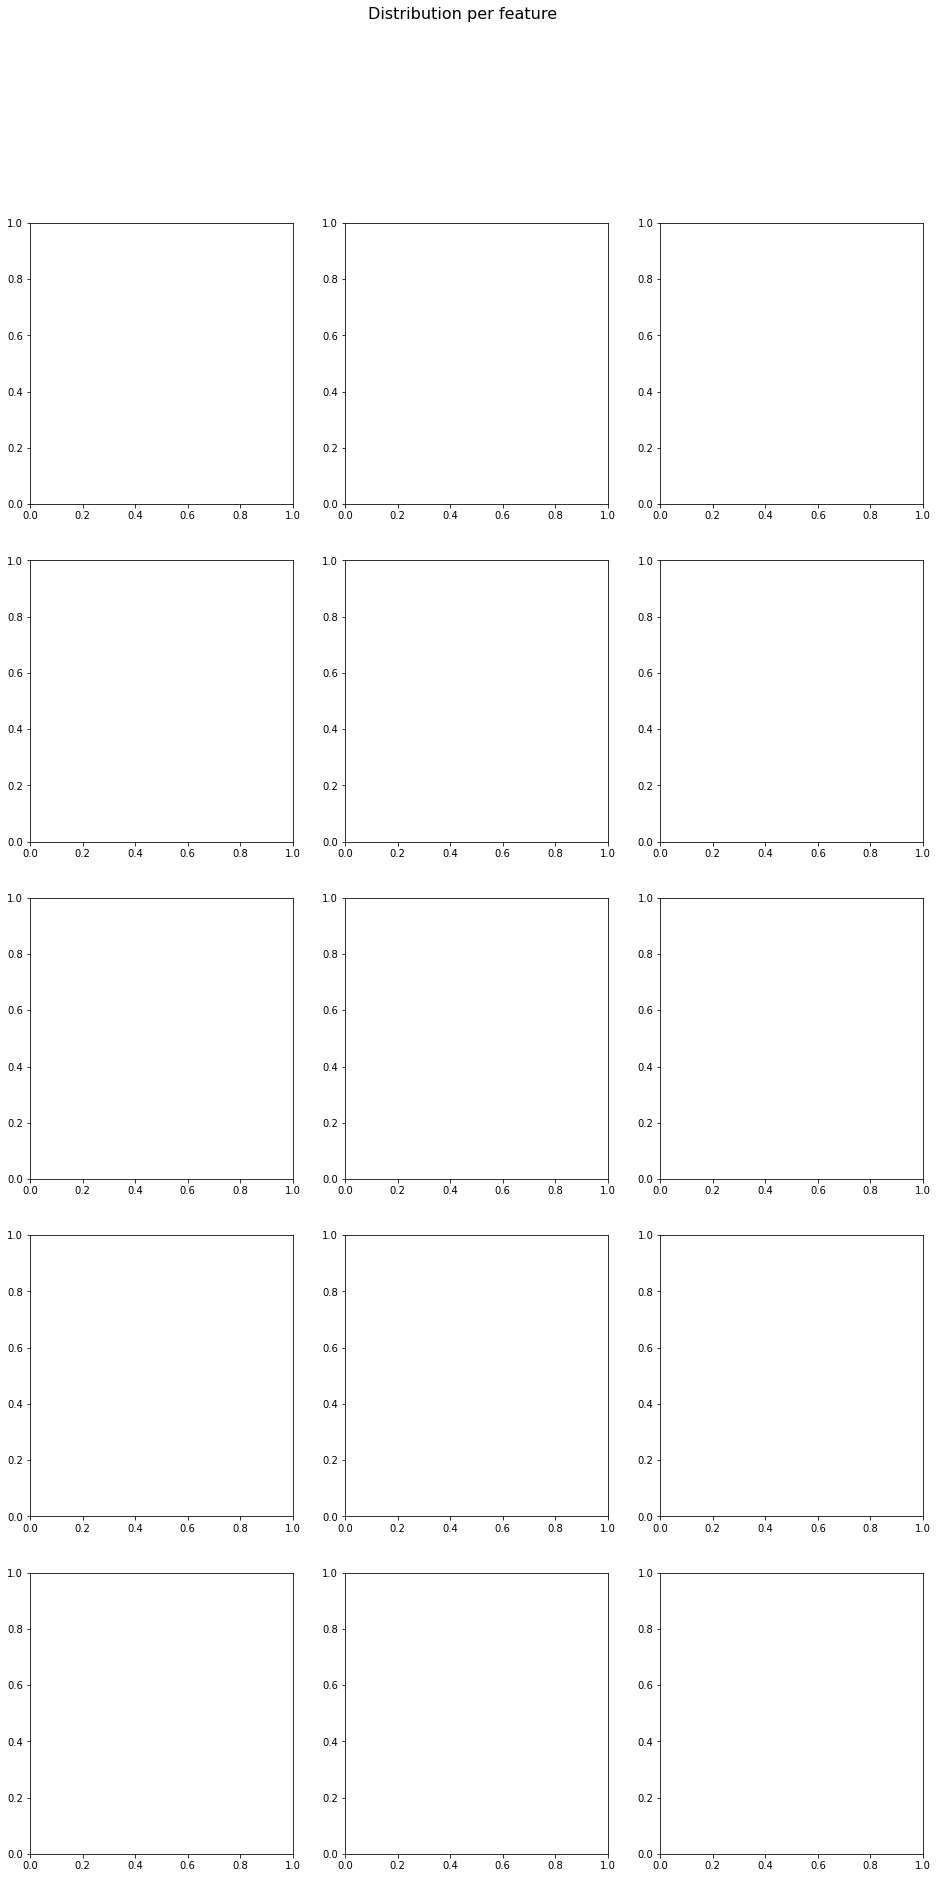

In [28]:
print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()